In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
target = "charges"
X = df.drop(columns=target)
y = df[target]

In [4]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.head()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [5]:
import numpy as np

In [6]:
np.random.seed(134234)
(np.random.random(10) * 100).astype("int")

array([59, 29, 88,  3, 56, 37, 35, 53, 26, 32])

In [7]:
from sklearn import model_selection, linear_model, metrics, preprocessing

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

In [9]:
len(X_train)/len(df)

0.6995515695067265

In [10]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [12]:
summary = pd.DataFrame({"actual": y_train, "prediction": y_train_pred})
summary["residual"] = summary.actual - summary.prediction
summary.head()

,actual,prediction,residual
744,8827.2099,9472.264706,-645.054806
363,2597.7790,2233.928867,363.850133
10,2721.3208,3423.054245,-701.733445
970,10702.6424,10718.882756,-16.240356
634,9391.3460,13789.363595,-4398.017595


In [13]:
mse_training = np.mean(summary.residual ** 2)
mse_training

36476790.76410683

In [14]:
rmse_training = np.sqrt(mse_training)
rmse_training

6039.601871324536

In [15]:
metrics.mean_squared_error(y_train, y_train_pred)

36476790.76410686

In [16]:
mae_train = np.mean(np.abs(summary.residual))
mae_train

4154.405109254062

In [17]:
rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

rmse_training, rmse_test


(6039.6018713245385, 6063.12265685045)

In [18]:
baseline = np.mean(y_train)

In [19]:
SST = np.sum((y_train - baseline) **2)
SSE = np.sum((y_train-y_train_pred) ** 2)
SSE/SST

0.24544425073668388

In [20]:
r2 = 1 - SSE/SST
r2

0.7545557492633161

In [21]:
metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred)

(0.7545557492633161, 0.7405989316927212)

In [22]:
target = "charges"
X = df.drop(columns=target)
y = df[target]

X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train.values.astype("float"))
X_test = scaler.transform(X_test.values.astype("float"))

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

rmse_training:  6039.6018713245385
rmse_test 6063.122656850451
r2_training:  0.7545557492633161
r2_test 0.7405989316927211


In [23]:
pd.DataFrame({"coefficient": lr.coef_, "feature": X_dummy.columns})

,coefficient,feature
0,3528.982731,age
1,1961.655208,bmi
2,421.550164,children
3,-141.359110,gender_male
4,9733.786883,smoker_yes
5,-129.545886,region_northwest
6,-414.541483,region_southeast
7,-379.095344,region_southwest


In [24]:
lr.intercept_

13276.698553898505

In [45]:
target = "charges"
X = df.drop(columns=target)
X["high_bmi"] = np.where(X["bmi"]>30, 1, 0)
X["age_group"] = np.where(X["age"]>50, "g1", "g2")

y = df[target]

X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train.values.astype("float"))
X_test = scaler.transform(X_test.values.astype("float"))

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

lr = linear_model.SGDRegressor(max_iter = 5000, tol=1e-4, eta0=1e-3
                               , learning_rate="invscaling")
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

rmse_training:  4311.1151613416005
rmse_test 4289.884611988139
r2_training:  0.8749408449739087
r2_test 0.8701415323604477


In [33]:
lr.n_iter_

237

In [50]:
a = np.array([
    [1, 1, 1],
    [1, 2, 3],
    [-1, 1, 2],
    [0, 1, 0]
])

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [-1.,  1.,  2.,  1., -1., -2.,  1.,  2.,  4.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [48]:
a = np.random.random((100, 1000))
poly = preprocessing.PolynomialFeatures(degree=2)
poly.fit_transform(a).shape

(100, 501501)

In [51]:
from sklearn import pipeline

In [97]:
target = "charges"
X = df.drop(columns=target)
X["high_bmi"] = np.where(X["bmi"]>30, 1, 0)
X["age_group"] = np.where(X["age"]>50, "g1", "g2")

#y =df[target]
y =np.log(df[target])


X_dummy = pd.get_dummies(X, drop_first=True).values.astype("float")
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(max_iter = 5000, tol=1e-4, eta0=1e-3
                               , learning_rate="invscaling"))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

rmse_training:  0.3957138862116184
rmse_test 0.3617825734036189
r2_training:  0.8150057105909438
r2_test 0.8444022861256595


In [58]:
est = pipe.steps[-1][-1]
est.coef_

array([ 9.90493372e+02,  1.07268274e+02,  3.86361381e+02,  1.35222020e+01,
       -1.38535484e+02,  9.37028157e+02,  2.52068658e+01,  2.33488520e+01,
       -1.42484477e+02, -3.49566698e+02,  1.17852759e+03,  6.03257938e+02,
        4.16948512e+02, -3.93568714e+01,  1.46150229e+02,  9.31851292e+02,
       -1.45033731e+02,  3.37303118e+02,  3.68769815e+02,  7.38900507e+01,
        3.36728259e+01,  2.45826759e+02, -4.76033100e+01, -1.12091974e+02,
        2.49416865e+03, -3.30343855e+01, -3.25075976e+02, -6.71872222e+01,
       -8.43492887e+01, -9.70783082e+01,  1.75402847e+01,  1.76699121e+00,
       -5.03235990e+02,  2.77307245e+02, -9.90366821e+01, -1.02249496e+02,
       -2.10145787e+02,  1.35222020e+01, -5.75304832e+01,  5.34655718e+03,
       -9.44473691e+01, -1.83761839e+02, -4.24268325e+02,  1.97266074e+02,
       -1.38535484e+02,  1.61878042e+02, -2.45318759e+01, -8.87385751e+01,
        4.54369158e+00,  4.09408812e+01,  9.37028157e+02,  2.50904701e+02,
        4.90930913e+02,  

In [59]:
est.n_iter_

190

In [60]:
a= [3, 6, 0 ,2, 4]

In [61]:
a[0]

3

In [62]:
a[-1]

4

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Residual plot')

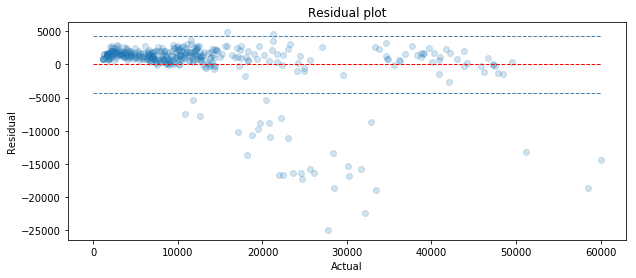

In [90]:
residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.2)
plt.hlines(0, 0, np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], 0, np.max(y_test)
                   , linestyle = "--", color = "steelblue", linewidth = 1)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

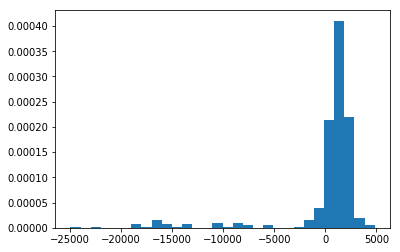

In [87]:
plt.hist(residuals_test, density=True, bins = 30);